Informasi Pribadi

1. Nama = Sri Kresna Maha Dewa
2. Email = srikresna383@gmail.com
3. TTL = Sidoarjo, 3 Agustus 2003
4. Domisili = Sumberpucung, Malang.
5. Instansi = Politeknik Negeri Malang

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikresna","key":"c90f9c19af6b129911ae9410dd23cde4"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [02:31<00:00, 24.3MB/s]
100% 3.24G/3.24G [02:31<00:00, 23.0MB/s]


In [5]:
!unzip a-large-scale-fish-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating: Fish_Dataset/Fish_

In [1]:
import os

os.listdir('/content/Fish_Dataset/Fish_Dataset')

['Trout',
 'Sea Bass',
 'license.txt',
 'Red Mullet',
 'Segmentation_example_script.m',
 'Striped Red Mullet',
 'Gilt-Head Bream',
 'Red Sea Bream',
 'README.txt',
 'Hourse Mackerel',
 'Black Sea Sprat',
 'Shrimp']

In [2]:
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Trout/Trout')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Trout/Trout GT')))


1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [3]:
from pathlib import Path

dataset = Path('/content/Fish_Dataset/Fish_Dataset')

images = list(dataset.glob('**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], images))

In [4]:
import pandas as pd

image = pd.Series(images).astype(str)
labels = pd.Series(labels)

df = pd.concat([image, labels], axis=1)

df.columns = ['image', 'label']
df
     

,image,label
0,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
1,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
2,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
3,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
4,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
...,...,...
17995,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17996,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17997,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17998,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp


In [5]:
new_df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
new_df

,image,label
0,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
1,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
2,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
3,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
4,/content/Fish_Dataset/Fish_Dataset/Trout/Trout...,Trout
...,...,...
8995,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
8996,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
8997,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
8998,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp


In [21]:
new_df.label.value_counts()

Trout                 1000
Sea Bass              1000
Red Mullet            1000
Striped Red Mullet    1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Hourse Mackerel       1000
Black Sea Sprat       1000
Shrimp                1000
Name: label, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(new_df, test_size=0.2,random_state=123)
#x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=123)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train,
                                                 x_col='image', 
                                                 y_col='label', 
                                                 target_size=(150,150),
                                                 color_mode='rgb', 
                                                 class_mode='categorical',
                                                 shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test,
                                                x_col='image',
                                                y_col='label',
                                                target_size=(150,150), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                shuffle=False)

#val = image_data_generator.flow_from_dataframe(dataframe=x_val, 
#                                               x_col='image', 
#                                               y_col='label', 
#                                               target_size=(150,150), 
#                                               color_mode='rgb', 
#                                               class_mode='categorical',
#                                               shuffle=False)


Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [46]:
import tensorflow as tf


model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation = 'softmax')
])

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)      

In [48]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy', 
              metrics=["accuracy"])

In [49]:
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto' 
)
history = model.fit(train, 
                    validation_data=test,
                    epochs=50,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn]
                    )

Epoch 1/50
225/225 [==============================] - 130s 574ms/step - loss: 1.8689 - accuracy: 0.2392 - val_loss: 1.4684 - val_accuracy: 0.4144 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 127s 564ms/step - loss: 1.3216 - accuracy: 0.4633 - val_loss: 1.1261 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 123s 549ms/step - loss: 0.9724 - accuracy: 0.6103 - val_loss: 0.8834 - val_accuracy: 0.6506 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 124s 550ms/step - loss: 0.7309 - accuracy: 0.7117 - val_loss: 0.6108 - val_accuracy: 0.7522 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 123s 546ms/step - loss: 0.5787 - accuracy: 0.7756 - val_loss: 0.4622 - val_accuracy: 0.8322 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 123s 547ms/step - loss: 0.4383 - accuracy: 0.8286 - val_loss: 0.3730 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 7/50
225/225 [==========================

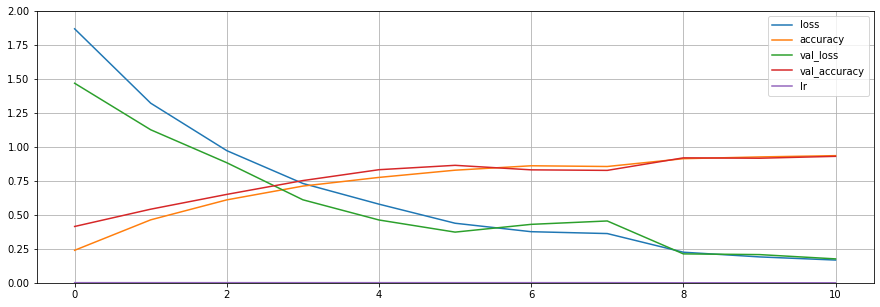

In [50]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)

plt.show()

In [51]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Konversi
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('proyek-akhir-dicoding.tflite', 'wb') as f:
  f.write(tflite_model)